In [1]:
import numpy as np
import pandas as pd
import pyspark

In [2]:
df = pd.read_csv('/Users/alexy161/Downloads/County/County_MedianRentalPrice_AllHomes.csv',encoding='latin1')
df = pd.melt(df, id_vars=['StateCodeFIPS','MunicipalCodeFIPS'], value_vars=['2010-01', '2010-02', '2010-03',
       '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09',
       '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03',
       '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09',
       '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03',
       '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09',
       '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03',
       '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10'])
df['FIPS'] = 1000*df.StateCodeFIPS + df.MunicipalCodeFIPS
df = df[['FIPS', 'variable', 'value']]
df.columns=['FIPS', 'date', 'rent']
fipsmin = df['FIPS']>36000
fipsmax = df['FIPS']<37000
dfa = df[fipsmin & fipsmax]
dfa

,FIPS,date,rent
6,36047,2010-01,NaN
9,36081,2010-01,NaN
19,36061,2010-01,NaN
23,36103,2010-01,NaN
25,36005,2010-01,NaN
26,36059,2010-01,NaN
43,36119,2010-01,NaN
49,36029,2010-01,NaN
75,36055,2010-01,NaN
137,36085,2010-01,NaN


In [3]:
df1 = pd.read_csv('/Users/alexy161/Downloads/Corporate Expansions.csv')
#df1.FIPS.astype(int)
df1 = df1.groupby(by=['FIPS', 'date']).sum()
df1

jobs  expansion  layoff
FIPS    date                              
36005.0 2017-03  4200.0        1.0     0.0
        2017-06   400.0        1.0     0.0
36047.0 2017-04   200.0        1.0     0.0
        2017-12    35.0        1.0     0.0
36061.0 2017-01  1000.0        1.0     0.0
        2017-05   130.0        1.0     0.0
        2017-06   201.0        2.0     0.0
        2017-07   270.0        2.0     0.0
        2017-08    30.0        1.0     0.0
        2017-10  2040.0        2.0     0.0
        2017-11  1232.0        2.0     0.0
36081.0 2017-07  1000.0        1.0     0.0
        2017-12    80.0        1.0     0.0
36085.0 2017-04   100.0        1.0     0.0
        2017-08  1137.0        1.0     0.0
        2017-09  2250.0        1.0     0.0
        2017-12    45.0        1.0     0.0

In [4]:
df2 = pd.merge(dfa,df1,left_on=['FIPS','date'],right_on=['FIPS','date'],how='outer')
df2.date = pd.to_datetime(df2.date,format='%Y-%m')
df2 = df2[['FIPS', 'date', 'rent', 'jobs']]
df2 = df2.fillna(0)
df2.jobs = df2.jobs.astype(int)
df2 = df2.sort_values(by=['date', 'FIPS'])
df2

,FIPS,date,rent,jobs
13,36001,2010-01-01,0.0,0
4,36005,2010-01-01,0.0,0
23,36015,2010-01-01,0.0,0
25,36021,2010-01-01,0.0,0
14,36027,2010-01-01,0.0,0
7,36029,2010-01-01,0.0,0
21,36045,2010-01-01,0.0,0
0,36047,2010-01-01,0.0,0
8,36055,2010-01-01,0.0,0
5,36059,2010-01-01,0.0,0


In [5]:
df3 = pd.read_csv('/Users/alexy161/Downloads/County/County_MedianRentalPrice_AllHomes.csv',encoding='latin1')
df3 = pd.melt(df3, id_vars=['StateCodeFIPS','MunicipalCodeFIPS'], value_vars=['2010-01', '2010-02', '2010-03',
       '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09',
       '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03',
       '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09',
       '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03',
       '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09',
       '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03',
       '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10'])
df3['FIPS'] = 1000*df3.StateCodeFIPS + df3.MunicipalCodeFIPS
df3 = df3[['FIPS', 'variable', 'value']]
df3.columns=['FIPS', 'date', 'rent']
fipsmin = df3['FIPS']>36000
fipsmax = df3['FIPS']<37000
df3a = df3[fipsmin & fipsmax]
df3a.date = pd.to_datetime(df3a.date,format='%Y-%m')
df3a['date'] = df3a['date'].apply(lambda x: x - pd.DateOffset(months=12))
df3a.columns = ['FIPS', 'date', 'rent2']

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
df2a = df2
df2a['date'] = df2a['date'].apply(lambda x: x - pd.DateOffset(months=12))

In [7]:
df2a.sort_values(by='date')
df2a = df2a[['FIPS','date','rent']]
df2a.columns = ['FIPS', 'date', 'rent2']
df2a

,FIPS,date,rent2
13,36001,2009-01-01,0.0
4,36005,2009-01-01,0.0
23,36015,2009-01-01,0.0
25,36021,2009-01-01,0.0
14,36027,2009-01-01,0.0
7,36029,2009-01-01,0.0
21,36045,2009-01-01,0.0
0,36047,2009-01-01,0.0
8,36055,2009-01-01,0.0
5,36059,2009-01-01,0.0


In [8]:
df2b = pd.merge(df2,df3a,left_on=['FIPS','date'],right_on=['FIPS','date'])
datemin = df2b['date']>'2016-12'
datemax = df2b['date']<'2018-10'
df2b = df2b[datemin & datemax]
df2b

,FIPS,date,rent,jobs,rent2
2496,36001,2017-01-01,1637.5,0,1637.5
2497,36005,2017-01-01,1600.0,0,1600.0
2498,36015,2017-01-01,850.0,0,850.0
2499,36021,2017-01-01,1850.0,0,1850.0
2500,36027,2017-01-01,1850.0,0,1850.0
2501,36029,2017-01-01,1200.0,0,1200.0
2502,36045,2017-01-01,1199.5,0,1199.5
2503,36047,2017-01-01,2500.0,0,2500.0
2504,36055,2017-01-01,1250.0,0,1250.0
2505,36059,2017-01-01,3100.0,0,3100.0


In [9]:
nyc = [36005, 36047, 36061, 36081, 36085]
df2b[df2b['FIPS'].isin(nyc)]

,FIPS,date,rent,jobs,rent2
2497,36005,2017-01-01,1600.0,0,1600.0
2503,36047,2017-01-01,2500.0,0,2500.0
2506,36061,2017-01-01,3450.0,0,3450.0
2512,36081,2017-01-01,2300.0,0,2300.0
2514,36085,2017-01-01,2300.0,0,2300.0
2523,36005,2017-02-01,1650.0,0,1650.0
2529,36047,2017-02-01,2497.0,0,2497.0
2532,36061,2017-02-01,3400.0,0,3400.0
2538,36081,2017-02-01,2300.0,0,2300.0
2540,36085,2017-02-01,2299.0,0,2299.0


In [10]:
df2b[df2b['FIPS'].isin(nyc)]

,FIPS,date,rent,jobs,rent2
2497,36005,2017-01-01,1600.0,0,1600.0
2503,36047,2017-01-01,2500.0,0,2500.0
2506,36061,2017-01-01,3450.0,0,3450.0
2512,36081,2017-01-01,2300.0,0,2300.0
2514,36085,2017-01-01,2300.0,0,2300.0
2523,36005,2017-02-01,1650.0,0,1650.0
2529,36047,2017-02-01,2497.0,0,2497.0
2532,36061,2017-02-01,3400.0,0,3400.0
2538,36081,2017-02-01,2300.0,0,2300.0
2540,36085,2017-02-01,2299.0,0,2299.0


In [11]:
df2b['rentchange'] = df2b.rent2-df2b.rent
df2b = df2b[df2b['FIPS'].isin(nyc)]
df2b

,FIPS,date,rent,jobs,rent2,rentchange
2497,36005,2017-01-01,1600.0,0,1600.0,0.0
2503,36047,2017-01-01,2500.0,0,2500.0,0.0
2506,36061,2017-01-01,3450.0,0,3450.0,0.0
2512,36081,2017-01-01,2300.0,0,2300.0,0.0
2514,36085,2017-01-01,2300.0,0,2300.0,0.0
2523,36005,2017-02-01,1650.0,0,1650.0,0.0
2529,36047,2017-02-01,2497.0,0,2497.0,0.0
2532,36061,2017-02-01,3400.0,0,3400.0,0.0
2538,36081,2017-02-01,2300.0,0,2300.0,0.0
2540,36085,2017-02-01,2299.0,0,2299.0,0.0


In [12]:
from sklearn.linear_model import LinearRegression
y = df2b.rentchange
X = df2b[['jobs']]

In [13]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

1.0

In [14]:
import statsmodels.api as sm
mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   jobs   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 29 Nov 2018   Prob (F-statistic):                nan
Time:                        11:02:19   Log-Likelihood:                    inf
No. Observations:                  50   AIC:                              -inf
Df Residuals:                      50   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rentchange          0          0        nan        n

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/anaconda3/lib/python3.6/site-packages/statsmode

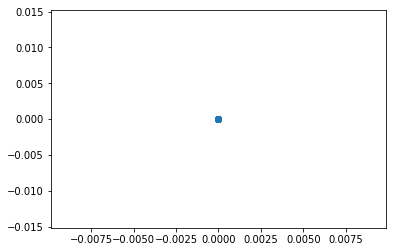

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show();

,company,county,NAICS,descript,date,new_expand,jobs,investment
0,"22nd Century Technologies, Inc.",Fairfax County,541511,"IT services, primarily for federal agencies.",2017-12-31,E,100,0.0000
1,Claroty,Fairfax County,561621,"Company detects cyber threats with advanced, r...",2017-12-31,E,2,0.0000
2,BNY Mellon Wealth Management,Fairfax County,523920,Provides wealth management services to private...,2017-12-31,E,4,0.0000
3,Cyren,Fairfax County,541511,Company uses its extensive cloud-based detecti...,2017-12-31,E,3,0.0000
4,"Datastrong, LLC",Fairfax County,541512,Business management software and services,2017-12-31,E,15,0.0000
5,"Dcmobility Holdings, LLC",Fairfax County,518210,Specialized professional service firm with a d...,2017-12-31,E,8,0.0000
6,Fundation,Fairfax County,523930,Credit solutions provider,2017-12-31,E,30,0.0000
7,Furnace MFG,Fairfax County,512210,Vinyl record manufacturer,2017-12-31,E,33,0.0000
8,GAMS Development Corp,Fairfax County,541511,High-level modeling system for mathematical pr...,2017-12-31,E,2,0.0000
9,Mellanox Federal Systems*,Fairfax County,541511,Government IT networking solutions,2017-12-31,E,3,0.0000


,month,county,jobs,investment
0,2014-01-01,Arlington County,173,1.7500
1,2014-01-01,Bristol,0,1.3320
2,2014-01-01,Charlotte County,0,1.8500
3,2014-01-01,Franklin County,20,1.2000
4,2014-01-01,Harrisonburg,75,39.5000
5,2014-01-01,Henrico County,18,54.7186
6,2014-01-01,James City County,60,7.2300
7,2014-01-01,Loudoun County,160,5.0000
8,2014-01-01,Lynchburg,33,21.3000
9,2014-01-01,Newport News,19,1.7750
